<a href="https://colab.research.google.com/github/jbell1991/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [4]:
# Creating a function to calculate the mean of sales for the past week
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def average(sales):
  return sum(sales) / len(sales)

print('The average sales for the past week is:', average(sales))

The average sales for the past week is: 3052.714285714286


In [5]:
# Checking to see if that output matches the one from NumPy
import numpy as np
np.mean(sales)

3052.714285714286

In [42]:
# Writing a function to calculate variance of sales for the past week
def variance(sales):
  return sum((average(sales) - sales_figure) ** 2 for sales_figure in sales) / (len(sales) - 1)

print('The variance of sales for the past week is:', variance(sales))

The variance of sales for the past week is: 214387.90476190473


In [25]:
# Checking to see if that output matches the one from NumPy
# ddof=1 for sample variance
np.var(sales, ddof=1)

214387.90476190473

In [38]:
# Writing a function to calculate standard deviation of sales for the past week
def standard_deviation(sales):
  return variance(sales)**(1/2.0)

print('The standard deviation of sales for the past week is:', standard_deviation(sales))

The standard deviation of sales for the past week is: 463.0204150595357


In [39]:
# Checking to see if that output matches the one from Numpy
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [40]:
# Creating a list for numbers of customers
num_cust = [127, 80, 105, 92, 120, 115, 93]

# Calculating the covariance between last week's sales number and the number of 
# customers
np.cov(sales, num_cust)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [48]:
# Writing a function to calculate the standard deviation of customers 
def std_dev(num_cust):
  average = sum(num_cust) / len(num_cust)
  variance = sum((average - cust_figure) ** 2 for cust_figure in num_cust) / (len(num_cust) - 1)
  return variance**(1/2.0)

print('The standard deviation of customers from last week is:', std_dev(num_cust))

The standard deviation of customers from last week is: 17.057326313123664


In [49]:
# Checking to see if the output matches the one from NumPy
np.std(num_cust, ddof=1)

17.057326313123664

In [91]:
# Calculating the correlation coefficient between sales and customers
corr_co = (np.cov(sales, num_cust)) / ((standard_deviation(sales))*(std_dev(num_cust)))

corr_co

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [63]:
# Checking to see if the output matches the one from NumPy
np.corrcoef(sales, num_cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [0]:
# The correlation coefficient between sales and customers is 0.96

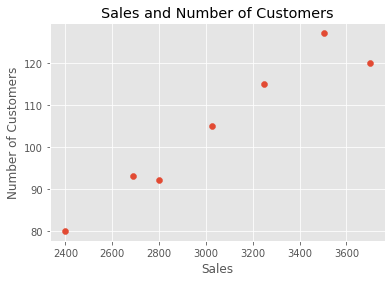

In [61]:
# Graphing the sales and customers on a scatter plot to see if the correlation 
# output passes the smell test
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.title('Sales and Number of Customers')
plt.xlabel('Sales')
plt.ylabel('Number of Customers')
plt.scatter(sales, num_cust)
plt.show()

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [86]:
import pandas as pd

# Loading the Titanic Dataset using index_col=[0] to get rid of the extra
# index column
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', 
                 index_col=[0])
 
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [87]:
# Calculating the covariance matrix for Titanic's numeric columns
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [88]:
# Calculating the correlation matrix for the Titanic's numeric columns
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

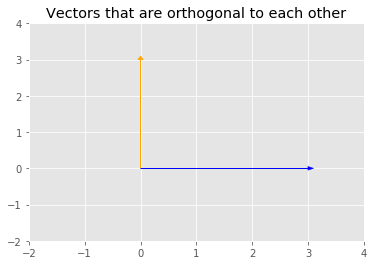

In [103]:
# Plotting two vectors that are orthogonal to each other
# A synonym for orthogonal is perpendicular

# Assigning vectors to variables
vector_1 = [0, 3]
vector_2 = [3, 0]

# Plotting the scaled vectors
plt.arrow(0, 0, vector_1[0], vector_1[1], head_width=.1, head_length=.1, color ='orange')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width=.1, head_length=.1, color ='blue')
plt.xlim(-2, 4)          
plt.ylim(-2, 4)
plt.title('Vectors that are orthogonal to each other')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Creating vector a
a = np.squeeze([[-5],
                [3],
                [7]])
# Creating vector b
b = np.squeeze([[6],
                [-8],
                [2]])

In [156]:
# Calculataing the dot product of a and b to see if it equals zero
np.dot(a, b)

-40

In [0]:
# No they are not othrogonal because their dot product != zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# Defining c and using np.squeeze to avoid an error
c = np.squeeze([[2, -15, 6, 20]])

In [163]:
# Calculating the norm of c^2
np.linalg.norm(c)**(2)

665.0

In [164]:
# Calculating the dot product of c and c 
np.dot(c, c)

665

In [0]:
# Defining c_T as c as a NumPy array
c_T = np.array([[2, -15, 6, 20]])

In [171]:
# Transposing c_T
c_T.T

array([[  2],
       [-15],
       [  6],
       [ 20]])

In [187]:
# Multiplying c_T and c
np.dot(c_T, c)

array([665])

In [0]:
# They're all the same

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# Defining vector f
f = [4, 12, 11, 9, 2]

In [177]:
# Defining f_hat as vector f divided by its norm
f_hat = f / (np.linalg.norm(f))

f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from math import pi
from math import e

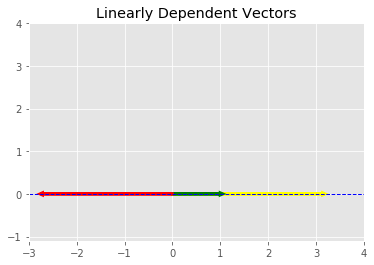

In [201]:
# Plotting two vectors that are linearly dependent

# Choosing x and y axis limits 
plt.xlim(-3 ,4)          
plt.ylim(-1.1,4)

# Assigning vector to variable
v = [1,0] 

# Scaling vectors
v2 = np.multiply(pi, v)
v3 = np.multiply(-e, v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

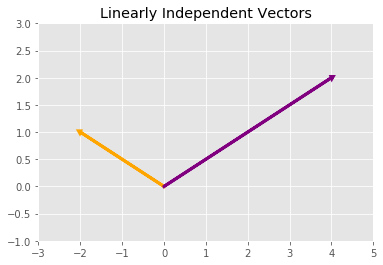

In [193]:
# Plotting two vectors that are linearly independent

# Choosing x and y axis limits 
plt.xlim(-3, 5)          
plt.ylim(-1,3)

# Assigning vectors to variables
a = [-2, 1] 
b = [4, 2]

# Plotting vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=.05, color ='orange')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=.05, color ='purple')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Might be able to spot some linear dependence (1 is a multiple of the other)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# compose these into a matrix - you should get the same answer for 5.2 as 7.1

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

In [0]:
# 8.1 is a stretch goal

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

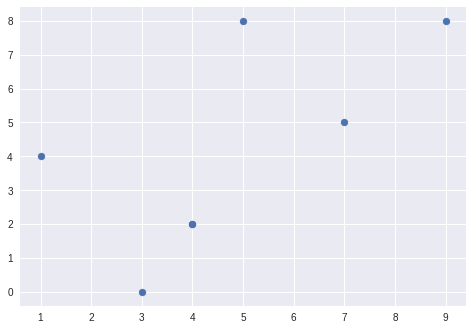

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()